In [85]:
#! /usr/bin/env python3
# Author: Meng Chen

# visualize the kSAT-meng.csv file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## Vis # of var and exe time

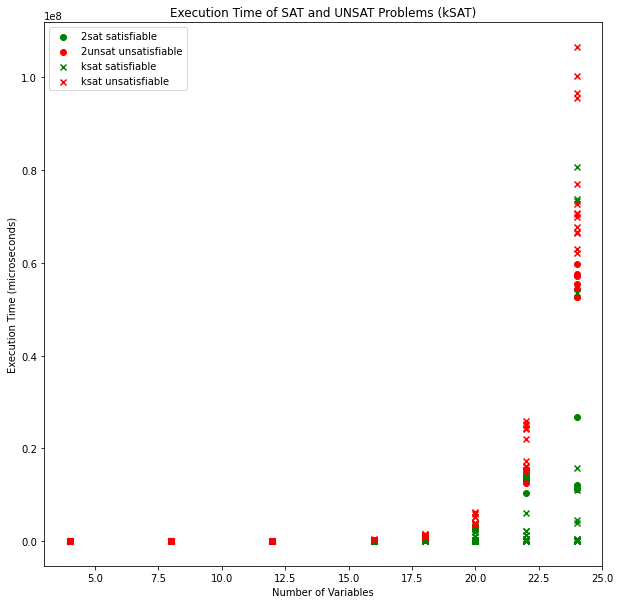

[ 1.17939074e-01  9.30628938e-01 -9.01525974e+02]


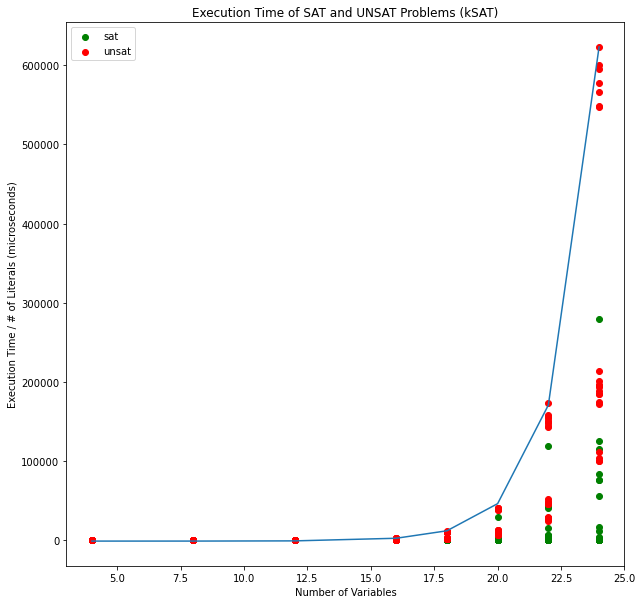

In [117]:
# read the csv file
df = pd.read_csv('kSAT-meng.csv',header=None)
# classify sat and unsat problems
sat = df[df.iloc[:,5] == 'S']
unsat = df[df.iloc[:,5] == 'U']


# plot the execution time of sat and unsat problems versus the number of variables
# 2sat
sat2 = sat[sat.iloc[:,3] == 2]
unsat2 = unsat[unsat.iloc[:,3] == 2]
# ksat
satk = sat[sat.iloc[:,3] > 2]
unsatk = unsat[unsat.iloc[:,3] > 2]
plt.figure(figsize=(10,10))
plt.scatter(sat2.iloc[:,1], sat2.iloc[:,7], c='green', label='2sat satisfiable')
plt.scatter(unsat2.iloc[:,1], unsat2.iloc[:,7], c='red',label='2unsat unsatisfiable')
plt.scatter(satk.iloc[:,1], satk.iloc[:,7], c='green',  marker='x',label='ksat satisfiable')
plt.scatter(unsatk.iloc[:,1], unsatk.iloc[:,7], c='red',  marker='x',label='ksat unsatisfiable')
plt.xlabel('Number of Variables')
plt.ylabel('Execution Time (microseconds)')
plt.title('Execution Time of SAT and UNSAT Problems (kSAT)')
plt.legend()
plt.show()

# find the max execution time for each number of variables
# plot a curve fit to the worst case times, again as a function of V
plt.figure(figsize=(10,10))
df.iloc[:,7] = df.iloc[:,7]/df.iloc[:,4]
sat = df[df.iloc[:,5] == 'S']
unsat = df[df.iloc[:,5] == 'U']
df_max = df.groupby(1).max()
# get unique number of variables

x = np.array(df.iloc[:,1].unique())
y = np.array((df_max.iloc[:,6]))

def exponential_func(x, a, b, c):
    return a * np.exp2(b*x) + c
# usage of curve_fit, refer to: https://stackoverflow.com/questions/49071167/fitting-the-python-plot-with-exponential-function
popt, pcov = curve_fit(exponential_func, x, y, p0=(1, 1e-6, 1))
yy = exponential_func(x, *popt)
print(popt)

plt.plot(x, yy)
plt.scatter(sat.iloc[:,1], sat.iloc[:,7], c='green', label='sat')
plt.scatter(unsat.iloc[:,1], unsat.iloc[:,7], c='red',label='unsat')
plt.xlabel('Number of Variables')
plt.ylabel('Execution Time / # of Literals (microseconds)')
plt.title('Execution Time of SAT and UNSAT Problems (kSAT)')
plt.legend()
plt.show()

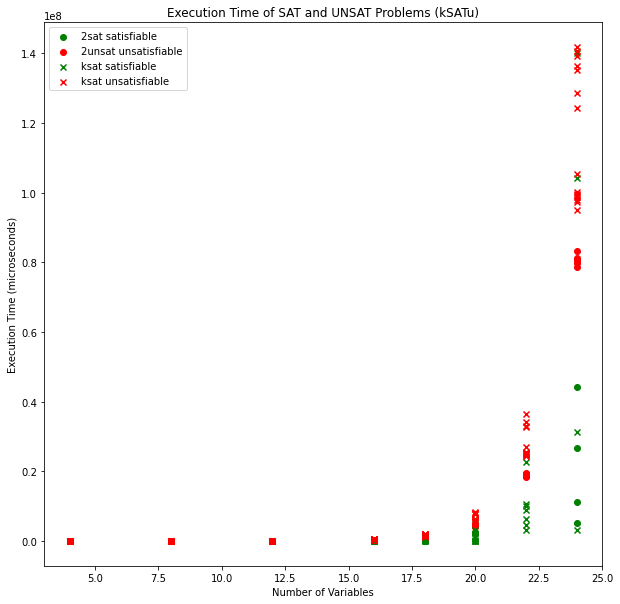

[7.25279694e-02 9.79536964e-01 3.39826357e+02]


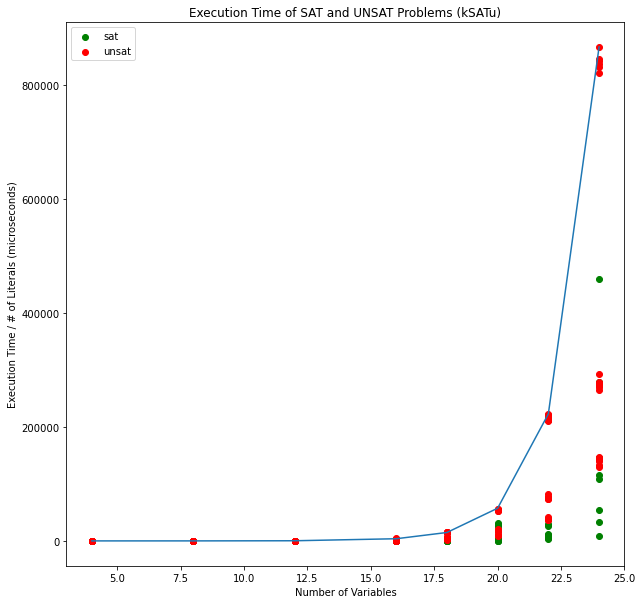

In [118]:
# read the csv file
df = pd.read_csv('kSATu-meng.csv',header=None)
# classify sat and unsat problems
sat = df[df.iloc[:,5] == 'S']
unsat = df[df.iloc[:,5] == 'U']


# plot the execution time of sat and unsat problems versus the number of variables
# 2sat
sat2 = sat[sat.iloc[:,3] == 2]
unsat2 = unsat[unsat.iloc[:,3] == 2]
# ksat
satk = sat[sat.iloc[:,3] > 2]
unsatk = unsat[unsat.iloc[:,3] > 2]
plt.figure(figsize=(10,10))
plt.scatter(sat2.iloc[:,1], sat2.iloc[:,7], c='green', label='2sat satisfiable')
plt.scatter(unsat2.iloc[:,1], unsat2.iloc[:,7], c='red',label='2unsat unsatisfiable')
plt.scatter(satk.iloc[:,1], satk.iloc[:,7], c='green',  marker='x',label='ksat satisfiable')
plt.scatter(unsatk.iloc[:,1], unsatk.iloc[:,7], c='red',  marker='x',label='ksat unsatisfiable')
plt.xlabel('Number of Variables')
plt.ylabel('Execution Time (microseconds)')
plt.title('Execution Time of SAT and UNSAT Problems (kSATu)')
plt.legend()
plt.show()

# find the max execution time for each number of variables
# plot a curve fit to the worst case times, again as a function of V
plt.figure(figsize=(10,10))
df.iloc[:,7] = df.iloc[:,7]/df.iloc[:,4]
sat = df[df.iloc[:,5] == 'S']
unsat = df[df.iloc[:,5] == 'U']
df_max = df.groupby(1).max()
# get unique number of variables

x = np.array(df.iloc[:,1].unique())
y = np.array((df_max.iloc[:,6]))

def exponential_func(x, a, b, c):
    return a * np.exp2(b*x) + c
# usage of curve_fit, refer to: https://stackoverflow.com/questions/49071167/fitting-the-python-plot-with-exponential-function
popt, pcov = curve_fit(exponential_func, x, y, p0=(1, 1e-6, 1))
yy = exponential_func(x, *popt)
print(popt)

plt.plot(x, yy)
plt.scatter(sat.iloc[:,1], sat.iloc[:,7], c='green', label='sat')
plt.scatter(unsat.iloc[:,1], unsat.iloc[:,7], c='red',label='unsat')
plt.xlabel('Number of Variables')
plt.ylabel('Execution Time / # of Literals (microseconds)')
plt.title('Execution Time of SAT and UNSAT Problems (kSATu)')
plt.legend()
plt.show()